# Titanic 

In [144]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


In [100]:
train_data_path = 'train.csv'

train_data = pd.read_csv(train_data_path)

print(train_data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [12]:
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#train_data.Age.isnull().sum()

train_data.isnull().sum().to_frame('no. of null values')

,no. of null values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Sex 

### Sex - it has no ordering of values (like Pclass). So use One-hot encoding

In [101]:
train_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [102]:
group_by_sex = train_data.groupby(by=['Sex'])

In [103]:
group_by_sex.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [104]:
group_by_sex.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [105]:
train_data = pd.get_dummies( train_data, columns = ['Sex'] )

---

In [106]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


# Embarked

In [197]:
train_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [198]:
group_by_emb = train_data.groupby(by=['Embarked'])

In [199]:
group_by_emb.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,fare_log_transformed,binned,age_binned
Embarked,,,,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,69,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,4,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,129,644,644,644,644,644


In [203]:
group_by_emb[group_by_emb['Survived']==1]

KeyError: 'Column not found: False'

In [204]:
group_by_emb.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,fare_log_transformed,binned,age_binned
Embarked,,,,,,,,,,,,
C,445.357143,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144,0.434524,0.565476,1.515398,2.505952,2.505952
Q,417.896104,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030,0.467532,0.532468,1.067051,2.142857,2.142857
S,449.527950,0.336957,2.350932,29.480855,0.571429,0.413043,27.079812,0.315217,0.684783,1.251076,2.425466,2.425466


---

In [ ]:
#Feature engineerin

Data Distribution - it summarises the probability of taking on a particular value

# Fare

#### Fare has a Heavy tailed distribution: more probability for taking on a value in tail range than a Gaussian distribution

Text(0, 0.5, 'number of occurence')

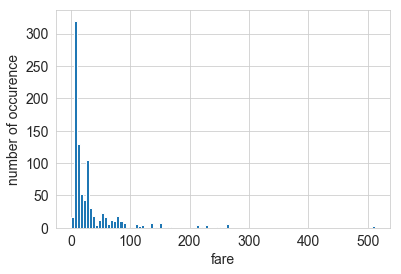

In [107]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

train_data['Fare'].hist(ax=ax, bins=100)

#ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('fare', fontsize=14)
ax.set_ylabel('number of occurence', fontsize=14)

In [108]:
# Log Transformation

train_data[train_data['Fare'] == 0]

# For fare=0, log transform is -infinity. So, add 1 to fares before log transform

#train_data['fare_log_transformed'] = np.log10(train_data['Fare'])
#train_data[train_data['fare_log_transformed'] < 0]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
179,180,0,3,"Leonard, Mr. Lionel",36.0,0,0,LINE,0.0,NaN,S,0,1
263,264,0,1,"Harrison, Mr. William",40.0,0,0,112059,0.0,B94,S,0,1
271,272,1,3,"Tornquist, Mr. William Henry",25.0,0,0,LINE,0.0,NaN,S,0,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",NaN,0,0,239853,0.0,NaN,S,0,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",19.0,0,0,LINE,0.0,NaN,S,0,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",NaN,0,0,239853,0.0,NaN,S,0,1
466,467,0,2,"Campbell, Mr. William",NaN,0,0,239853,0.0,NaN,S,0,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",NaN,0,0,239854,0.0,NaN,S,0,1
597,598,0,3,"Johnson, Mr. Alfred",49.0,0,0,LINE,0.0,NaN,S,0,1
633,634,0,1,"Parr, Mr. William Henry Marsh",NaN,0,0,112052,0.0,NaN,S,0,1


Text(0, 0.5, 'number of occurence')

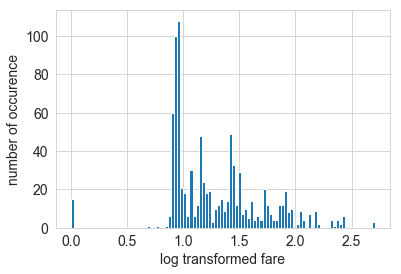

In [109]:
# After log transform the data distribution seems linear(normal)

train_data['fare_log_transformed'] = np.log10(train_data['Fare'] + 1)

sns.set_style('whitegrid')
fig, ax = plt.subplots()

train_data['fare_log_transformed'].hist(ax=ax, bins=100)

ax.tick_params(labelsize=14)
ax.set_xlabel('log transformed fare', fontsize=14)
ax.set_ylabel('number of occurence', fontsize=14)

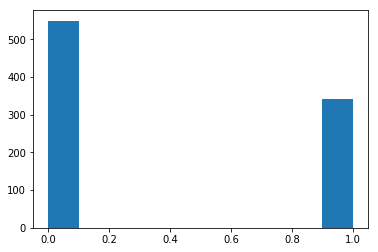

In [13]:
x = train_data.Survived
y = train_data.Fare

#Scatter
#plt.scatter(x, y)

#Line
#plt.plot(x, y)

#histogram
plt.hist(x)

# plt.savefig("name.png")
plt.show() 

---

# Age

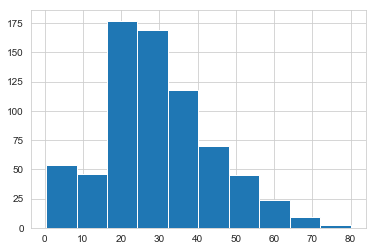

In [110]:
# Univariate Plot: Histogram - to understand each attribute independently

train_data['Age'].hist(bins=10)

Text(0, 0.5, 'number of occurence')

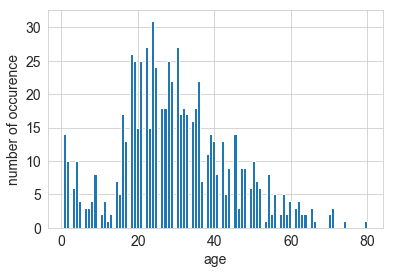

In [111]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

train_data['Age'].hist(ax=ax, bins=100)

#ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('age', fontsize=14)
ax.set_ylabel('number of occurence', fontsize=14)

In [112]:
train_data['Age'].isnull().sum()

177

In [113]:
train_data[train_data['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,fare_log_transformed
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,0,1,0.975813
17,18,1,2,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,NaN,S,0,1,1.146128
19,20,1,3,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,NaN,C,1,0,0.915136
26,27,0,3,"Emir, Mr. Farred Chehab",NaN,0,0,2631,7.2250,NaN,C,0,1,0.915136
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,NaN,Q,1,0,0.948374
29,30,0,3,"Todoroff, Mr. Lalio",NaN,0,0,349216,7.8958,NaN,S,0,1,0.949185
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,1,0,PC 17569,146.5208,B78,C,1,0,2.168853
32,33,1,3,"Glynn, Miss. Mary Agatha",NaN,0,0,335677,7.7500,NaN,Q,1,0,0.942008
36,37,1,3,"Mamee, Mr. Hanna",NaN,0,0,2677,7.2292,NaN,C,0,1,0.915358
42,43,0,3,"Kraeff, Mr. Theodor",NaN,0,0,349253,7.8958,NaN,C,0,1,0.949185


In [ ]:
#train_data['Age'].replace(0, np.nan, inplace= True)

In [114]:
mean_value = train_data['Age'].mean()
print(mean_value)

29.69911764705882


In [115]:
train_data['Age'] = train_data['Age'].fillna(mean_value)

In [116]:
train_data['Age'].isnull().sum()

0

In [134]:
train_data['age_binned'] = np.floor_divide(train_data['Age'], 10)
print (train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [132]:

bins = [0, 12, 17, 24, 34, 44, 54, 64, 74, 100]
train_data['binned'] = pd.cut(train_data['Age'], bins)
print (train_data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [ ]:
PolyFeatures

In [ ]:
# DO NOT EXECUTE BELOW FILLNA 'AGE' codes

In [90]:
mean_value_female = train_data[train_data['Sex_female']== 1]['Age'].mean()
mean_value_male = train_data[train_data['Sex_male']== 1]['Age'].mean()

print(str(mean_value_male) + " | " + str(mean_value_female))

30.72664459161148 | 27.915708812260537


In [99]:
train_data['Age'] = train_data[train_data['Sex_female']== 1]['Age'].fillna(mean_value_female)

In [98]:
train_data['Age'].isnull().sum()

577

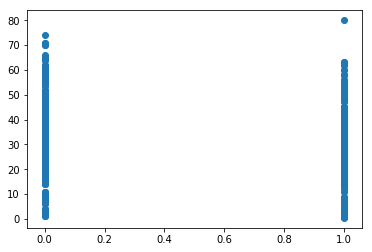

In [103]:
x = train_data.Survived
y = train_data.Age

#Scatter
plt.scatter(x, y)

#Line
#plt.plot(x, y)

#histogram
#plt.hist(x)

# plt.savefig("name.png")
plt.show() 

In [104]:
# Filling the Missing values

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


## Split dataset into test and cv

In [118]:
from sklearn.model_selection import train_test_split


feature_cols=['Pclass', 'Fare', 'Age', 'Sex_female', 'Sex_male']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)                                             

In [124]:
from sklearn.model_selection import train_test_split


feature_cols=['Pclass', 'fare_log_transformed', 'Age','Sex_female', 'Sex_male']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)                                             

In [219]:
from sklearn.model_selection import train_test_split


feature_cols=['Pclass', 'fare_log_transformed', 'age_binned','Sex_female', 'Sex_male', 'Pclass', 'Parch']
X = train_data[feature_cols]
y = train_data.Survived

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=1)    

In [220]:
train_x.describe()

,Pclass,fare_log_transformed,age_binned,Sex_female,Sex_male,Pclass,Parch
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.300562,1.287056,2.467697,0.349719,0.650281,2.300562,0.370787
std,0.836643,0.421244,1.401856,0.477216,0.477216,0.836643,0.775968
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.949185,2.000000,0.000000,0.000000,2.000000,0.000000
50%,3.000000,1.189162,2.000000,0.000000,1.000000,3.000000,0.000000
75%,3.000000,1.501002,3.000000,1.000000,1.000000,3.000000,0.000000
max,3.000000,2.710396,8.000000,1.000000,1.000000,3.000000,6.000000


In [221]:
# Polynomial Features 

feature_cols=['Pclass', 'fare_log_transformed', 'age_binned','Sex_female', 'Sex_male', 'Pclass', 'Parch']

X = train_data[feature_cols]
y = train_data.Survived

X_poly = PolynomialFeatures(include_bias=False).fit_transform(X)


print(X.shape)
print(X_poly.shape)

(891, 7)
(891, 35)


In [208]:
X_poly

array([[3.        , 0.91645395, 2.        , ..., 1.        , 3.        ,
        9.        ],
       [1.        , 1.85903797, 3.        , ..., 0.        , 0.        ,
        1.        ],
       [3.        , 0.95060822, 2.        , ..., 0.        , 0.        ,
        9.        ],
       ...,
       [3.        , 1.38827886, 2.        , ..., 0.        , 0.        ,
        9.        ],
       [1.        , 1.49136169, 2.        , ..., 1.        , 1.        ,
        1.        ],
       [3.        , 0.94200805, 3.        , ..., 1.        , 3.        ,
        9.        ]])

In [149]:
train_x, test_x, train_y, test_y = train_test_split(X_poly, y, test_size=0.20, random_state=1)    

# 1. Naive Bayes

##### Naive Bayes (NB) Classification - performs well in binary classification tasks 

In [222]:
from sklearn.naive_bayes import GaussianNB

# Initialize our classifier
gnb_model = GaussianNB()

# Train our classifier
gnb_model.fit(train_x, train_y)

# Make predictions
predict = gnb_model.predict(test_x)

### Evaluation - Accuracy Score

In [223]:

# Evaluate accuracy
print(accuracy_score(test_y, predict))

0.7597765363128491


# 2. Logistic Regression

In [243]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression(random_state=1)

linear_model.fit(train_x, train_y)

predict_lin = linear_model.predict(test_x)

/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [244]:
# Evaluate accuracy: normal Fare
print(accuracy_score(test_y, predict_lin))

0.8044692737430168


In [129]:
# Evaluate accuracy: fare_log_transformed
print(accuracy_score(test_y, predict_lin))

0.7932960893854749


In [141]:
# Evaluate accuracy: fare_log_transformed
print(accuracy_score(test_y, predict_lin))

0.7821229050279329


In [151]:
# Evaluate accuracy: fare_log_transformed
print(accuracy_score(test_y, predict_lin))

0.770949720670391


---

# 3. SVM

In [226]:
from sklearn import svm

clf = svm.SVC(C=110,gamma='scale')
clf.fit(train_x, train_y)  

SVC(C=110, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [229]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(train_x, train_y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [230]:
predict_svm = clf.predict(test_x)

In [231]:
print(accuracy_score(test_y, predict_svm))

0.776536312849162


In [232]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10, 100, 200, 1000, 2000]
gammas = [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 1000]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid)
grid_search.fit(X, y)
grid_search.best_params_

/Users/sathishkaliamoorthy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10, 'gamma': 0.1}

In [234]:
from sklearn import svm

clf = svm.SVC(C=10,gamma=0.1)
clf.fit(train_x, train_y)  

predicted_svm = clf.predict(test_x)
print(accuracy_score(test_y, predicted_svm))

0.7821229050279329


In [253]:
test_data = pd.read_csv("test.csv")

test_data = pd.get_dummies( test_data, columns = ['Sex'] )


test_data["Fare"].fillna(0, inplace = True) 

mean_value = test_data['Age'].mean()
test_data['Age'] = test_data['Age'].fillna(mean_value)

In [254]:
print(test_data.describe())
print(feature_cols)

       PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   
std     120.810458    0.841838   12.634534    0.896760    0.981429   
min     892.000000    1.000000    0.170000    0.000000    0.000000   
25%     996.250000    1.000000   23.000000    0.000000    0.000000   
50%    1100.500000    3.000000   30.272590    0.000000    0.000000   
75%    1204.750000    3.000000   35.750000    1.000000    0.000000   
max    1309.000000    3.000000   76.000000    8.000000    9.000000   

             Fare  Sex_female    Sex_male  
count  418.000000  418.000000  418.000000  
mean    35.541956    0.363636    0.636364  
std     55.867684    0.481622    0.481622  
min      0.000000    0.000000    0.000000  
25%      7.895800    0.000000    0.000000  
50%     14.454200    0.000000    1.000000  
75%     31.471875    1.000000    1.000000  
max    512.329200

In [255]:
test_data['fare_log_transformed'] = np.log10(test_data['Fare'] + 1)

test_data['age_binned'] = np.floor_divide(test_data['Age'], 10)

In [256]:
test_data_x = test_data[feature_cols]

test_data_x.describe()

,Pclass,fare_log_transformed,age_binned,Sex_female,Sex_male,Pclass,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,1.306736,2.681818,0.363636,0.636364,2.265550,0.392344
std,0.841838,0.424751,1.288840,0.481622,0.481622,0.841838,0.981429
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.949185,2.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,1.189047,3.000000,0.000000,1.000000,3.000000,0.000000
75%,3.000000,1.511507,3.000000,1.000000,1.000000,3.000000,0.000000
max,3.000000,2.710396,7.000000,1.000000,1.000000,3.000000,9.000000


In [258]:
predict_lin = linear_model.predict(test_data_x)

In [259]:
predict_lin.shape

(418,)

In [ ]:
predict_line[predict_line['survived']==1].sum()

In [260]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'survived': predict_lin})
output.to_csv('submission.csv', index=False)

In [261]:
output.head()

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
